#Overview of this Notebook

**This notebook contains two parts:**
* Part 1: Predictions
* Part 2: Inference using OLS

### Exploratory Analysis:
In our exploratory analysis, we tried five models on the train set, made predictions on the validation set, and selected the best model to make predictions on the test set. The models we tried were simple OLS, Lasso regression, generalized linear regression, svm, and linear svm. After making predictions on the validation set with math scores as the dependent variable, we found that the svm model had the lowest RMSE score of 11.92. The other models had higher RMSE scores of 15.77 (OLS), 12.16 (Lasso), 12.39 (generalized linear regression), and 37.72 (linear svm). With survey scores as the dependent variable, we found that the svm model also had the lowest RMSE score of 0.22. The other models had higher RMSE scores of 0.41 (OLS), 0.42 (Lasso), 0.41 (generalized linear regression), and 0.70 (linear svm). Finally, we used the svm to make predictions on the test set and found that this model worked very well in terms of prediction accuracy. 

We hope this analysis is helpful for policy makers as they make decisions about funding, class size, location of the school, and demographic composition. With the model we validated, they should be able to make predictions about school performance based on changes in the variables just mentioned.


### Final Analysis:

In sum, we found that the best model that captures our two dependent variables of math score and survey score is the SVM model. The SVM model had the lowest RMSE for both dependent variables (11.75 for math score and 0.416 for survey score).

Because we were also interested in analyzing the coefficients of each variable we took at closer look at the ols model. From the ols model we were able to see that in determining math score, the variables that were statistically significant included funding, average class size, female percentage, black percentage, and Hispanic percentage. In regards to predicting survey score, the variables that were significant included funding, average number of crime, average class size, and female percentage. 

More specifically, we saw that increasing funding, average class size, and the percentage of females in a class all increased math score, and increasing the percentage of Blacks and Hispanics decreased math score. 

For the survey analysis, we saw that increasing the average number of students in a class, increasing the percentage of females and increasing the average number of crimes all lead to an increase in the survey results. We also notice that an increase in funding lead to a decrease in survey results.

In addition, when we analyzed our correlation matrix, we noticed that funding and average number of crime are highly correlated (this makes sense because as crime increases, funding will also increase). 

Our final analysis in this workbook included creating a LASSO and Elastic - net graph to test which variables appear in the models first. For both math score and survey score, the average class size appeared in the model first (this implies that this variable had the largest effect on the model).

In our initial project proposal, we sought to answer a couple questions. Through our analysis within this process book, we have successfully answered those questions. The questions and answers are as follows:  


#Part 1: Predictions:

With our clean data, we are now ready to do some regression analysis. In this section, in order to understand the relationship between the dependent and independent variables, we are seeking to find the best model that captures this relationship. In other words, we are interested in using our data points to estimate a function to approximate the true unknown function that represents the true relationship between the various variables. 


**Steps performed:**

- A. Separated the data into train, test, and validation set.
- B. Fit five different regression models - simple OLS, Lasso regression, generalized linear regression, svm, and linear svm on the train set with math scores as the dependent variable.
- C. Made Predictions on the validation set and compared the RMSE scores to select the best model.
- D. Used the best model to fit the test set and plotted predicated values against actual values.
- E. Repeated the above 4 steps with students' evaluation of school performance as the dependent variable.




In [106]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import statsmodels.api as sm

In [107]:
mergedf = pd.read_csv("mergedf_final.csv")

##1A. Seperating the Data
To do this, we first split our dataset into training, validation, and testing sets. We chose a ratio of 0.33 to split the training and testing set. So the training set contained 0.67 of the total data points and the testing set contained 0.33 of the total data points. We then again split the training set into a training set and a validation set at a ratio of 0.33. So the training set contained 0.67 of the data points in the original training set, or 0.45 of the total data points, and the validation set contained 0.33 of the data points in the original training set, or 0.22 of the total data points. With this setting, we got our training, validation, and testing sets with shapes of (2212, 39), (1090, 39), (1627, 39) respectively. 

In [108]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(mergedf, test_size=0.33)

In [109]:
train, validate = train_test_split(train, test_size = 0.33)

In [110]:
print train.shape, validate.shape, test.shape

(2212, 39) (1090, 39) (1627, 39)


In [111]:
# First we use scores as our dependent variable
# variables
X_train = train[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_train_score = train['Mean_Scale_Score']
X_validation = validate[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_validation_score = validate['Mean_Scale_Score']
X_test = test[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_test_score = test['Mean_Scale_Score']

In [112]:
# Define a function to calculate the RMSE score
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

##1B - 1C. Fit 5 Different Regression Models & Made Predictions on the Validation Set

We fit five models on the train set and then made predictions on the validation set. The models we tried were simple OLS, lasso regression, generalized linear model, svm, and linear svm. After doing the predictions, we calculate the RMSE scores for each of the models and compared them to see how well our model works on the validation set.

In [113]:
# Now try five different models on the train set and select the best one in terms of RMSE score
# OLS
ols = sm.OLS(y_train_score, X_train).fit()
y_ols_pred = ols.predict(X_validation)
get_rmse(y_validation_score, y_ols_pred)

15.404629412424296

In [114]:
# Lasso regression
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(X_train, y_train_score)
y_lasso_pred = clf_lasso.predict(X_validation)
get_rmse(y_validation_score, y_lasso_pred)

12.513107464043976

In [115]:
# Generalized linear model
from sklearn import linear_model
clf_gen = linear_model.LinearRegression()
clf_gen.fit(X_train, y_train_score)
y_gen_pred = clf_gen.predict(X_validation)
get_rmse(y_validation_score, y_gen_pred)

12.357423056869576

In [116]:
# svm
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train_score)
y_svm_pred = clf_svm.predict(X_validation)
get_rmse(y_validation_score, y_svm_pred)

11.74734012447073

In [117]:
# Linear svm
from sklearn.svm import LinearSVC
from sklearn import grid_search
clf_linear_svm = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clf_linear_svm, param_grid=parameters, cv=5)
best.fit(X_train, y_train_score)
y_linear_svm_pred = best.predict(X_validation)
get_rmse(y_validation_score, y_linear_svm_pred)

37.107950630558946

If we compare the RMSE scores of the these regression models, we see that the svm model has the smallest RMSE score (RMSE of 11.314) and thus makes the best predictions in terms of the root-mean-square error between actual values and predictions. So we'll use the svm model to do predictions on the test set to see how it really works.

##1D. Predictions vs. Actual Results in Math Test Scores

After choosing the svm model as our best model, we use this model to make predictions on the test set. We then plot the predicted values against the actual values to check how well this model works on the test set.

In [118]:
# We see from above that the svm model works best. So we use this model
# We calculate the predicted scores on the test set using this model
y_pred_score = clf_svm.predict(X_test)

RMSE for svm Model 11.874342087


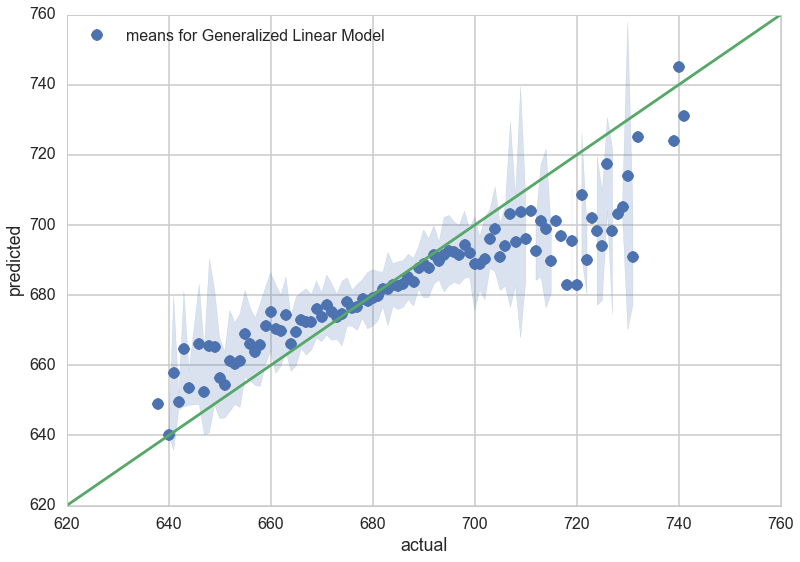

In [119]:
# Plot the predicted scores against the actual ones
df=pd.DataFrame(dict(actual = y_test_score, predicted = y_pred_score))
xp = []
yp = []
fig = plt.figure()
ax = plt.gca()
for k,v in df.groupby('actual'):
    xp.append(k)
    yp.append(v.predicted.mean())
cl, = ax.plot(xp, yp, 'o', label = "means for %s" % "Generalized Linear Model")
c = cl.get_color()
sig = df.groupby('actual').predicted.std().values
ax.fill_between(xp, yp - sig, yp + sig, color = c, alpha = 0.2)
ax.set_xlabel("actual")
ax.set_ylabel("predicted")
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
ax.legend(frameon = False, loc = "upper left")
rmse = get_rmse(y_test_score, y_pred_score)
print "RMSE for %s" % "svm Model", rmse

As we can see from the this plot above, the predicted scores are very close to the 45 degree line, meaning that the predicted scores are very similar to the actual scores and so we are making good predictions using the svm model. In addition, the bands are not very wide, especially when the scores are low, which means that our predictions are not only acurate but also stable.

This exercise can be very useful for policy makers who are interested in predicting school performance with changes in the various variables. With this svm model, policy makers will be able to predict school performance based on the input. They will thus be able to find the ideal funding, class size, school location (average crime in the sorrounding area), and demographic composition to maximize school perfomance.

##1E. Repeat Fitting and Predictions with Survey Scores as the Dependent Variable

In [120]:
# Then we use survey data as the dependent variable
# Variables
X_train = train[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_train_survey = train['Aca_s_11']
X_validation = validate[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_validation_survey = validate['Aca_s_11']
X_test = test[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_test_survey = test['Aca_s_11']

In [121]:
# Now try five different models on the train set and select the best one in terms of RMSE score
# OLS
ols = sm.OLS(y_train_survey, X_train).fit()
y_ols_pred = ols.predict(X_validation)
get_rmse(y_validation_survey, y_ols_pred)

0.41785936571368498

In [122]:
# Lasso regression
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(X_train, y_train_survey)
y_lasso_pred = clf_lasso.predict(X_validation)
get_rmse(y_validation_survey, y_lasso_pred)

0.41844052492335132

In [123]:
# Generalized linear model
from sklearn import linear_model
clf_gen = linear_model.LinearRegression()
clf_gen.fit(X_train, y_train_survey)
y_gen_pred = clf_gen.predict(X_validation)
get_rmse(y_validation_survey, y_gen_pred)

0.40643587918526108

In [124]:
# svm
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train_survey)
y_svm_pred = clf_svm.predict(X_validation)
get_rmse(y_validation_survey, y_svm_pred)

0.20931303565258749

In [125]:
# Linear svm
from sklearn.svm import LinearSVC
from sklearn import grid_search
y_train_survey = [int(x) for x in y_train_survey]
clf_linear_svm = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clf_svm, param_grid=parameters, cv=5)
best.fit(X_train, y_train_survey)
y_linear_svm_pred = best.predict(X_validation)
get_rmse(y_validation_survey, y_linear_svm_pred)

0.65840044059501646

If we compare the RMSE scores of the these regression models, we see that the svm model has the smallest RMSE score (RMSE of 0.209) and thus makes the best predictions in terms of the root-mean-square error between actual values and predictions. So we'll use the svm model to do predictions on the test set to see how it really works.

## Predictions vs. Actual Results in Survey Scores:

In [126]:
# We see from above that the svm model works best. So we use this model.
# First calculate the predicted scores on the test set using this model
y_pred_survey = clf_svm.predict(X_test)

RMSE for svm Model 0.19265181638


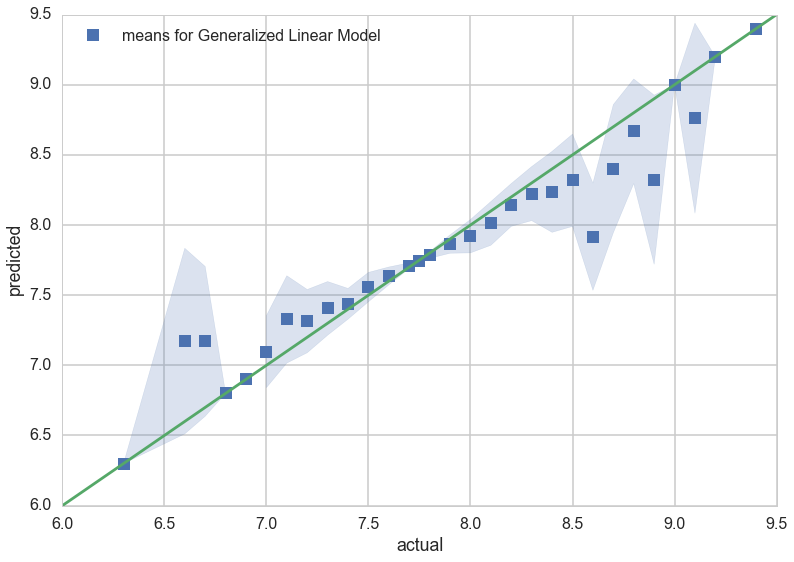

In [127]:
# Plot the predicted scores against the actual ones
df=pd.DataFrame(dict(actual = y_test_survey, predicted = y_pred_survey))
xp = []
yp = []
fig = plt.figure()
ax = plt.gca()
for k,v in df.groupby('actual'):
    xp.append(k)
    yp.append(v.predicted.mean())
cl, = ax.plot(xp, yp, 's', label = "means for %s" % "Generalized Linear Model")
c = cl.get_color()
sig = df.groupby('actual').predicted.std().values
ax.fill_between(xp, yp - sig, yp + sig, color = c, alpha = 0.2)
ax.set_xlabel("actual")
ax.set_ylabel("predicted")
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
ax.legend(frameon = False, loc = "upper left")
rmse = get_rmse(y_test_survey, y_pred_survey)
print "RMSE for %s" % "svm Model", rmse

Similar to the plot we saw in math scores, the predicted survey scores are very close to the 45 degree line, meaning that the predicted survey scores are very similar to the actual scores and so we are making good predictions using the svm model. However, the bands for some of the datapoints are much wider than the others, which means that while our prediction is accurate, it is not as stable as with the math scores.

Again, this exercise can be very useful for policy makers who are interested in predicting school performance with changes in the various variables. With this svm model, policy makers will be able to predict school performance based on the input. They will thus be able to find the ideal funding, class size, school location (average crime in the sorrounding area), and demographic composition to maximize school perfomance.

# Part 2: Inference using OLS

Even though svm is shown to be the best model as seen through comparative analysis of the RMSE, in order to analyze the significance of each variable through their p-values and in order to create an interactive tool such that policy makers can manipulate the variables to output both a math score and a survey score, we decided to use the ols model to obtain the coefficients for each variable as well as the variables p-value

###Significance of coefficients:
Below, we are interested in seeing what the significance of each variable is, using an alpha level of 0.05. We ran a summary of the ols model to obtain the coeficients, p-values, and confidence intervals of our variables on both the predicting math score as well as survey score result (academic acheivment from the students' perspective) 

### Math Score Output

In [128]:
#seperate the dataframe into only including the rows we need for scatterplots and visualizations later on 
cols = ["Mean_Scale_Score", "Aca_s_11", 'Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']
deletecols = []
for i in mergedf.columns:
    if i in cols:
        continue
    else:
        deletecols.append(i)
df = mergedf.drop(deletecols, axis = 1)

In [129]:
#run model regressing the variables in the function below 
from sklearn import linear_model
import statsmodels.formula.api as sm
score_model = sm.ols("Mean_Scale_Score ~ np.log(Funding) + Avg_No_Crim_N + Average_Class_Size + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage", data=mergedf, missing='drop').fit()
print score_model.summary()


                            OLS Regression Results                            
Dep. Variable:       Mean_Scale_Score   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     655.0
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        12:16:04   Log-Likelihood:                -19313.
No. Observations:                4929   AIC:                         3.864e+04
Df Residuals:                    4920   BIC:                         3.870e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             684.0226    

### Survey Data OLS Output

In [130]:
survey_model = sm.ols("Aca_s_11 ~ np.log(Funding) + Avg_No_Crim_N + Average_Class_Size + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage", data=mergedf, missing='drop').fit()
print survey_model.summary()

                            OLS Regression Results                            
Dep. Variable:               Aca_s_11   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     37.10
Date:                Wed, 09 Dec 2015   Prob (F-statistic):           1.24e-57
Time:                        12:16:07   Log-Likelihood:                -2441.8
No. Observations:                4929   AIC:                             4902.
Df Residuals:                    4920   BIC:                             4960.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               8.9058    

#Result of Output:
## Survey Score Result:
From the output, we can see that the variables that are not significant include the demographic information: Asian %, Black %, Hispanic %, and White %. All these variables have a p-value that is greater than 0.05. All the other variables, which include funding, average number of crimes, class size, and female % are all significant and contribute to predicting a student's academic achievement.

## Math Score Result:
From the output, we can see that average number of crimes, asian %, and white % are not statistically significant, and can therefore not acurately predict the math score result. All the other variables which include funding, average class size, female %, black %, and hispanic %, all contribute to predicitng the result of students' math scores

## Correlation Matrix: 
In order to see how the variables are correlated to one another, we ran a correlation matrix (one showing a color scale and another showing the values). In the color gradient below, boxes representing the intersection of two variables that are colored with darker shades are more highly correlated than variables whose intersections are colored less intensly. From both matrixes, we can see that funding and average crime rates are highly correlated (0.693). Though there is no statistical cut-off to determine what variables are *highly correlated*, we have made the subjective analysis that funding and average crime is *highly correlated* 

In [207]:
df_corr = df.drop(["Mean_Scale_Score", "Aca_s_11"], axis = 1)

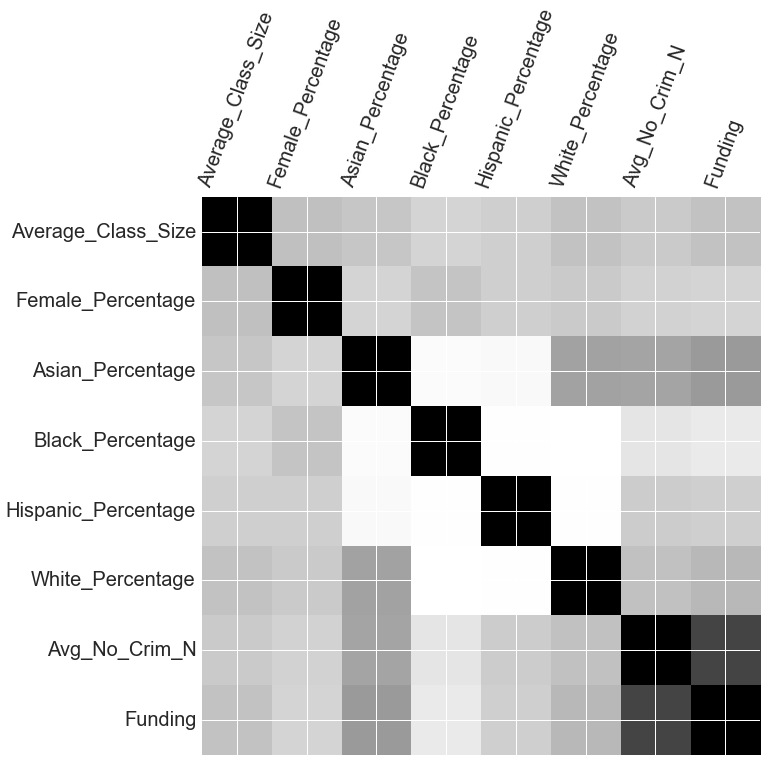

In [215]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70, fontsize = 20);
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 20)
  
plot_corr(df_corr)

To find the exact values of the correlations among the variables, we plotted a table that outputs the numerical correlations between each variable

In [216]:
df_corr.corr()

,Average_Class_Size,Female_Percentage,Asian_Percentage,Black_Percentage,Hispanic_Percentage,White_Percentage,Avg_No_Crim_N,Funding
Average_Class_Size,1.000000,0.075444,0.036161,-0.049485,-0.018623,0.062346,0.011247,0.061707
Female_Percentage,0.075444,1.000000,-0.052915,0.048503,-0.025269,0.008700,-0.043441,-0.050064
Asian_Percentage,0.036161,-0.052915,1.000000,-0.404443,-0.375112,0.218787,0.213935,0.257075
Black_Percentage,-0.049485,0.048503,-0.404443,1.000000,-0.432100,-0.444010,-0.181618,-0.220866
Hispanic_Percentage,-0.018623,-0.025269,-0.375112,-0.432100,1.000000,-0.433267,-0.001147,-0.017749
White_Percentage,0.062346,0.008700,0.218787,-0.444010,-0.433267,1.000000,0.074834,0.117106
Avg_No_Crim_N,0.011247,-0.043441,0.213935,-0.181618,-0.001147,0.074834,1.000000,0.692586
Funding,0.061707,-0.050064,0.257075,-0.220866,-0.017749,0.117106,0.692586,1.000000


## Interactive Visualization using coefficients from the above ols regression output
In order for policy makers to test the output of both math scores and survey scores with changes in each of the above variables, we created an interactive tool. This interactive tool takes the coeficients from each variable in the above ols model to change the math and survey result based on inputs from policy makers. 

For the interactive visualization, we sought to create a tool that would allow users to experiment with different combinations of variables and see the predicted results outputted by our OLS regression model on both math score and survey results. To do this, we created html elements that would allow users to specify the combination of variable values they would like to test. Then we created d3 selectors that would run an update_score function, which would output predicted score values by plugging the selected variables values into the linear equations for math and survey score prediction. In other words, we imported the coefficients outputted by our OLS model into the code for the interactive tool and multiplied them with corresponding selected variable values to predict scores. To facilitate usage, we also included a hopscotch tour feature that walks users through the tool’s features. Additionally, we added pie chart visualizations that helped users conceptualize the demographic and gender breakdown they had chosen, each of which allows users to hover over the legend element or a pie segment of interest to highlight which specific group each segment represents. 

Finally, we included variables that weren't statistically significant in our interaction model because those variables were used to capture the coefficients in the other statistically significant variables. Hence, we wouldnt be able to acuraly represent the math and survey predicted results without the user being able to select and change all the variables that were included in the model.

**The interaction tool can be found at the following url:** http://mchoi4194.github.io/


In the below clode we outputed a json file of the coeficients that is then read into our javascript code to create the interaction tool. 

In [133]:
coef_score = []
for i in score_model.params:
    coef_score.append(i)
parameters = ["Intercept", "Funding", "Average Class Size", "Average Number of Crimes", "Female Percentage", "Asian Percentage", "Black Percentage", "Hispanic Percentage", "White Percentage"]
score_output = dict(zip(parameters, coef_score))
# print score_output
coef_survey = []
for i in survey_model.params:
    coef_survey.append(i)
parameters = ["Intercept", "Funding", "Average Class Size", "Average Number of Crimes", "Female Percentage", "Asian Percentage", "Black Percentage", "Hispanic Percentage", "White Percentage"]
survey_output = dict(zip(parameters, coef_survey))
# print survey_output

import json
with open('coef_survey.json', 'w') as outfile:
    json.dump(survey_output, outfile)
with open('coef_math.json', 'w') as outfile:
    json.dump(score_output, outfile)

{'Black Percentage': -57.568868126641661, 'Funding': 1.0556293935566692, 'Hispanic Percentage': -59.356637687415912, 'Asian Percentage': -15.72423919011456, 'Female Percentage': 45.265983310905973, 'Intercept': 684.02262576786916, 'Average Number of Crimes': 0.16465291673624458, 'White Percentage': -15.788583442824091, 'Average Class Size': 0.17943867280130049}
{'Black Percentage': 0.086826426850201033, 'Funding': -0.12416276494394682, 'Hispanic Percentage': 0.33036657917230561, 'Asian Percentage': 0.24961031672858636, 'Female Percentage': 0.51539747960076066, 'Intercept': 8.9058269965407888, 'Average Number of Crimes': 0.0057971461088749347, 'White Percentage': 0.51172241198919322, 'Average Class Size': 0.017688213986779958}


## Visualization of Coefficients

### Math Score: 
From the graph below, we can see that the mean slope of Asian Percentage, Black Percentage, Hispanic Percentage, and White Percentage are all negative. This implies that as these four demographic variables increase, math score decreases. The bands around the means incidcate the standard deviation for the variables. Since the standard deviation for the Asian and White Percentage variable spreads to contain positive values as well, this indicates that asian and white percentage are not statistically significant for predicting math score (the value for the coefficient could contain zero). 

We also notice that female percentage has a positive value, indicating that as the female percentage increases, math score dramatically increases as well. In adition, Funding also has a positive coefficient, so as funding increases, math score increases as well

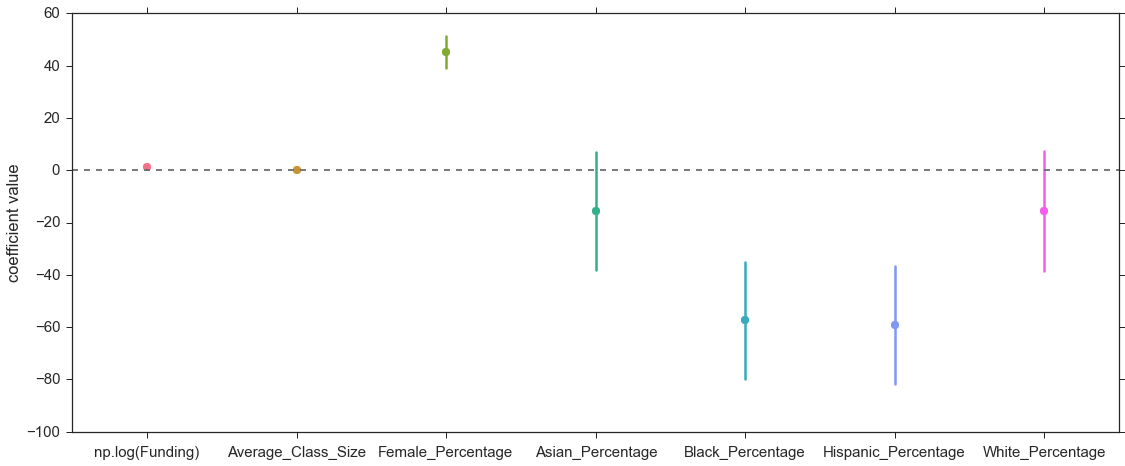

In [233]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Mean_Scale_Score ~ np.log(Funding) + Average_Class_Size  + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage"
reg_results = sm.ols(f, data=mergedf).fit().summary()

sns.set(style="ticks", font_scale = 1.5)
mpl.rc("figure", figsize=(15, 15))

sns.coefplot(f,mergedf,intercept=False)
plt.gca().set_ylabel("coefficient value");

### Survey Result: 
From the graph below, we can see that the mean slope of Asian Percentage, Black Percentage, Hispanic Percentage, and White Percentage are all positive; however, are not statistically significnant because the bands contain the value zero, indicating that there could be no relationship with these varaibles and survey result. 

We also notice that female percentage has a positive value, indicating that as the female percentage increases, survey score result increases as well. In adition, Funding also has a negative coefficient, so as funding increases, survey score decreases

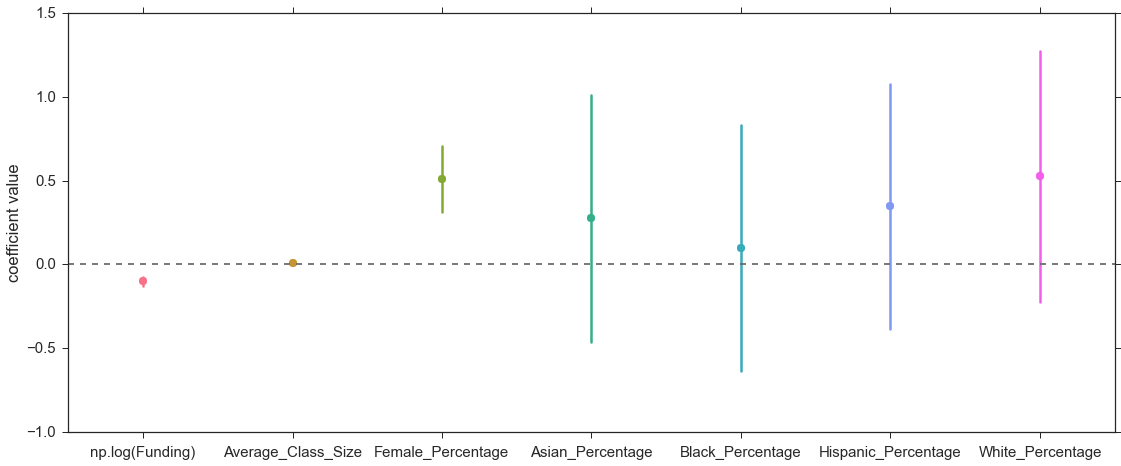

In [234]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Aca_s_11~ np.log(Funding) + Average_Class_Size  + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage"
reg_results = sm.ols(f, data=mergedf).fit().summary()

sns.set(style="ticks", font_scale = 1.5) 
mpl.rc("figure", figsize=(15, 15))

sns.coefplot(f,mergedf,intercept=False)
plt.gca().set_ylabel("coefficient value");

## Pairplot of Variables Used
Though we have the visualization of the coefficients above, we are interested to see a scatter plot of the variables against our two dependent variables in order to answer a couple questions: why does the female coefficient have such a positive slope, and even though not statistically significant, what does the demographic visualizations look like against the dependent variables? We explore these questions below in the pairplot 

### Interpretation of graph below:
From the graph, we are primarly interesting in look at the interaction between the independent variables and the Mean Scale Score (math score) as well as the independent variables and the survey result. These individiual scatter plots that we would like to take a closer look at are in the 1st and 9th rows (up to down). 

To answer the question about the **Female Coefficient** in both graphs, we noticed the following:

* The values for the female coefficient lie between 0.4 and 0.6 (a very small range)
* Around this spread, the math scores and survey scores vary widely. The best fit line for this graph looks close to verticle, and as a result, the slope is very high. 

From the **math score** as the dependent variable, we have noticed the following:

*In regards to the demographic information:*
* There is a positive slope when mean scale score is plotted against white percentage, Asian percentage, and female percentage. This means that as white percentage and asian percentage in a classroom increases, math score increases as well.
* There is a negative slope when mean scale score is plotted against black percentage and hispanic percentage. This means that as black percentage and hispanic percentage in a classroom increases, math score decreases. 

*Other:*
* There is a positive slope when mean scale score is plotted against Aca_s_11 (the self-reported academic achievement of a student). This means that higher self reporting academic achievement from students yields higher math scores in those schools.
* in the histogram of the math score, we see that the distribution looks normally distributed with a mean of around 665.

From the **Self reported academic acheivment from the students** as the dependent variable, we have noticed the following:

* No significant conclusions can be made because the slopes for the variables seems to be horizontal 
* In the histogram of the self reported academic acheivment, we see that the distribution looks normally distributed with a mean of around 8 points.

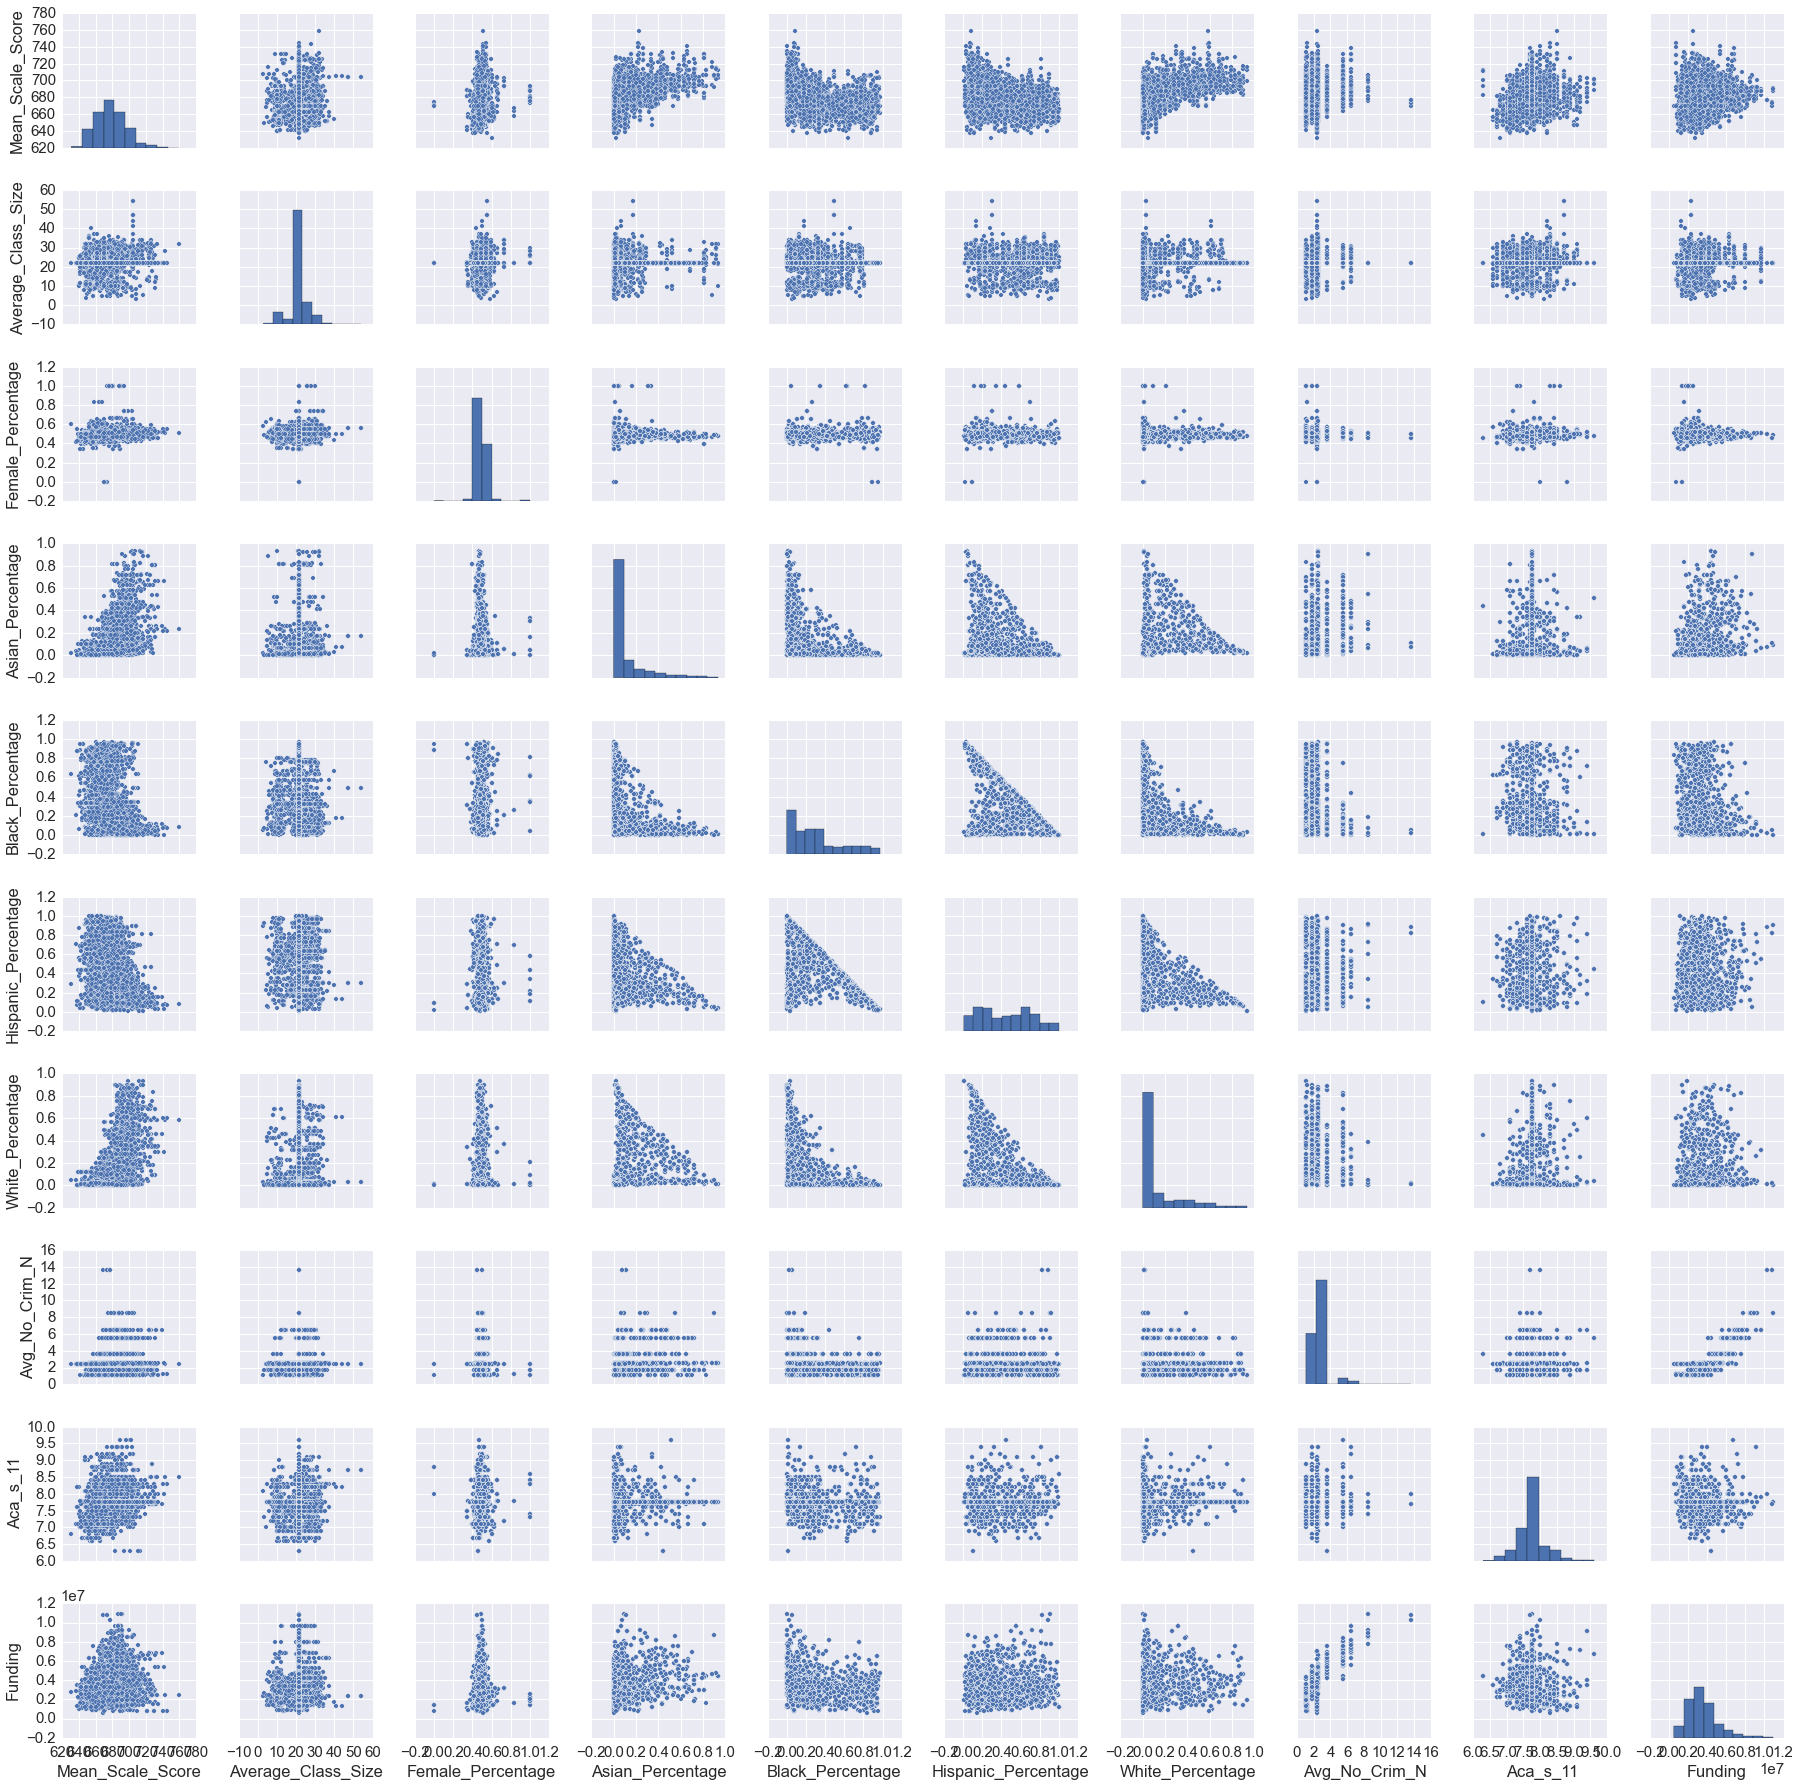

In [239]:

# plot_df.head()
import seaborn as sns
sns.set(font_scale = 1.5)

sns.pairplot(df)

# Using LASSO to visualize significance of coefficients in the model

Here we use regularization to get rid of the redundant information. 

Penalization techniques, such as the ridge regression, achieves better prediction through a bias-variance trade-off. Lasso is able to do both continuous shrinkage and automatic variable selection. Here, we want to get rid of redundant information and see what variables are first appearing in our model. Shown below, we ran first the lasso and elastic-net path and then we showed just the elastic net path to display what variables are coming into the data first for both the math score and the survey score result. The reason why we run the first graph is to show the lasso against the elastic-net. The elastic net encourages a grouping effect, where strongly correlated predictors tend to be in or out of the model together.
## Elastic-Net Paths For Math Score:

From the first graph below, you can see that the Average Class Size is the first variable to enter the model for both the lasso and elastic net prediction. More variables including funding and then white and hispanic percentage are then next in entering the model, however, only for the net-elastic output (as indicated by the dashed lines).

In the second graph, you can more clearly tell the variables that eneter the model from the elastic net path output. Here we see that Average class size enters first, and then funding. 

In [202]:
from sklearn.linear_model import lasso_path, enet_path
eps = 5e-6  # the smaller it is the longer is the path

y_score = df['Mean_Scale_Score']
df_xcols = df.drop(["Mean_Scale_Score", "Aca_s_11"], axis = 1)
y = y_score.values.astype(np.double)
X = df_xcols.values.astype(np.double)
X /= X.std(axis=0)


In [203]:
%%time
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

Computing regularization path using the lasso...
Computing regularization path using the elastic net...
CPU times: user 16.5 ms, sys: 2.92 ms, total: 19.4 ms
Wall time: 19.2 ms


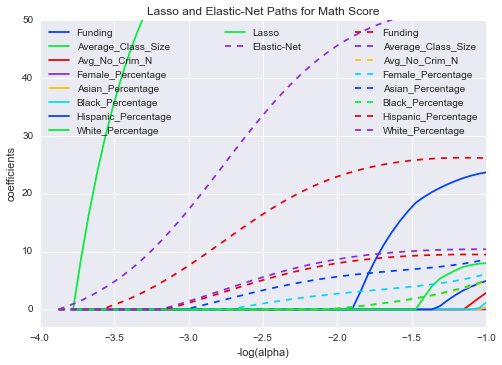

In [204]:
col = sns.color_palette("bright", 256)
keep = np.abs(coefs_enet.T[99,:]) > 0.05
# make the lasso path
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlim([-4, -1])
plt.ylim([-3, 50])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths for Math Score')

plt.gca().add_artist(plt.legend(l1, list(X_train.columns.values[keep]), loc='upper left'))
plt.gca().add_artist(plt.legend(l2, list(X_train.columns.values[keep]), loc='upper right'))
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='upper center')

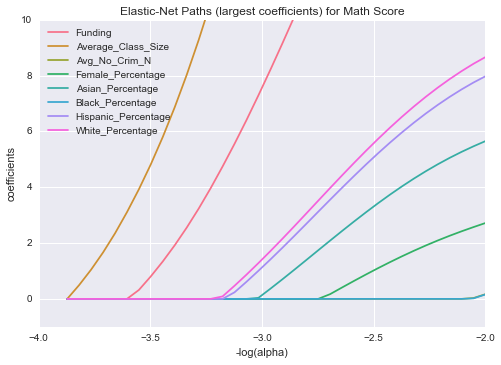

In [206]:
keep = np.abs(coefs_enet.T[99,:]) > 0.05
col = sns.color_palette("husl", keep.sum())

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T[:,keep])
plt.xlim([-4, -2])
plt.ylim([-1, 10])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients) for Math Score')
plt.legend(l2, list(X_train.columns.values[keep]), loc='upper left')

## Create the Elastic-Net Paths for Survey Scores:

In the two graphs below, we can analyze what variables are the first to enter the model. Here, average number of crime enters the model first in both the lasso and elastic net outputs (hows in the first graph), and then average class size. 

It is interesting that in the second graph, when we just graphed the elastic net path, we saw that average number of crimes doesn't appears in the model until much later, and that average class size first appears. 

In [198]:
y_score = df['Aca_s_11']
y = y_score.values.astype(np.double)

In [199]:
%%time
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

Computing regularization path using the lasso...
Computing regularization path using the elastic net...
CPU times: user 14.8 ms, sys: 1.27 ms, total: 16.1 ms
Wall time: 15.3 ms


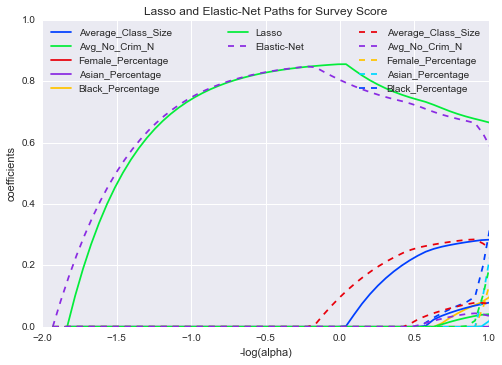

In [200]:
# Color Palette, seaborn has the best colors i.m.o.
col = sns.color_palette("bright", 256)
keep = np.abs(coefs_enet.T[99,:]) > 0.05
# make the lasso path
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlim([-2, 1])
plt.ylim([0, 1])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths for Survey Score')


plt.gca().add_artist(plt.legend(l1, list(X_train.columns.values[keep]), loc='upper left'))
plt.gca().add_artist(plt.legend(l2, list(X_train.columns.values[keep]), loc='upper right'))
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='upper center')

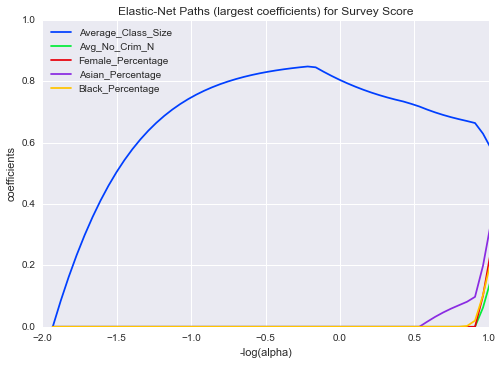

In [201]:
keep = np.abs(coefs_enet.T[99,:]) > 0.05
col = sns.color_palette("bright", keep.sum())

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T[:,keep])
plt.xlim([-2, 1])
plt.ylim([0, 1])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients) for Survey Score')
plt.legend(l2, list(X_train.columns.values[keep]), loc='upper left')